In [66]:
import sys
import os.path as op
module_path = op.abspath(op.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import mne
import h5py
from scipy.io import savemat, loadmat

from data_analysis.functions_connectivity import \
    epochs_ispc, multi_ispc, core_ispc
from data_analysis.functions_graph_theory import \
    multi_small_world

# define which ISPCS to calculate
#['202','203','204','205','206','207','208','209','211','212']
subj_pair = '203'

# conditions ["early", "late"]
condition = "early"


subject_dir = "/net/store/nbp/projects/hyperscanning/hyperscanning-2.0/mne_data/sourcedata/"
behav_dir = "/net/store/nbp/projects/hyperscanning/study_project/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData"
result_dir = "/net/store/nbp/projects/hyperscanning/study_project/results"


In [2]:
# get the baseline
baseline = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", subj_pair + "_baseline"))[0]
early = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", subj_pair + "_" + condition + ""))[0]


Reading /net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_baseline ...


<ipython-input-2-26899937ed9b>:2: RuntimeWarning: This filename (/net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_baseline) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5 or _tfr.h5
  baseline = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", subj_pair + "_baseline"))[0]


Not setting metadata
Reading /net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_early ...


<ipython-input-2-26899937ed9b>:3: RuntimeWarning: This filename (/net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_early) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5 or _tfr.h5
  early = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", subj_pair + "_" + condition + ""))[0]


Not setting metadata


In [42]:
early_ep = early[0].average()
base_ep = baseline[0].average()
diff_ep = early_ep.copy()
diff_ep.data -= base_ep.data


No baseline correction applied
No baseline correction applied


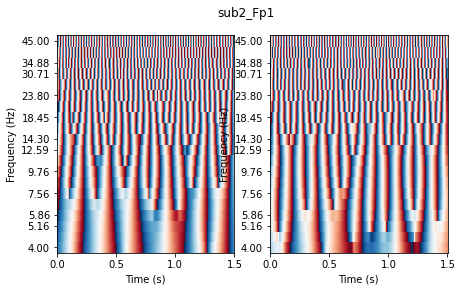

In [35]:
fig, axis = plt.subplots(1, 2, figsize=(7, 4))
early_ep.plot(picks=["sub1_Fp1"], colorbar=False, show=False, axes=axis[0])
early_ep.plot(picks=["sub2_Fp1"], colorbar=False, show=False, axes=axis[1])
plt.show()

No baseline correction applied
No baseline correction applied


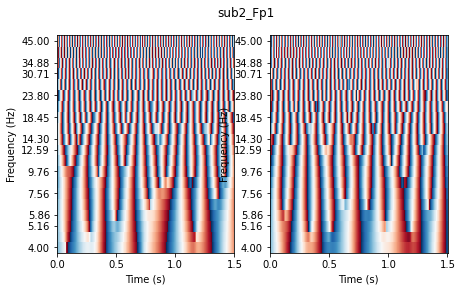

In [36]:
fig, axis = plt.subplots(1, 2, figsize=(7, 4))
base_ep.plot(picks=["sub1_Fp1"], colorbar=False, show=False, axes=axis[0])
base_ep.plot(picks=["sub2_Fp1"], colorbar=False, show=False, axes=axis[1])
plt.show()

No baseline correction applied
No baseline correction applied


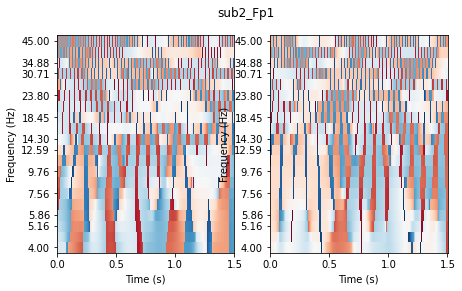

In [37]:
fig, axis = plt.subplots(1, 2, figsize=(7, 4))
diff_ep.plot(picks=["sub1_Fp1"], colorbar=False, show=False, axes=axis[0])
diff_ep.plot(picks=["sub2_Fp1"], colorbar=False, show=False, axes=axis[1])
plt.show()


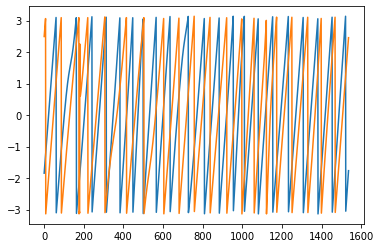

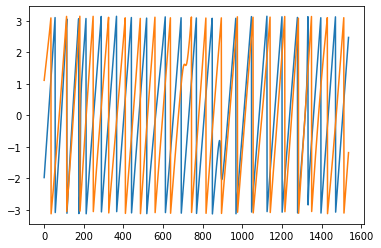

In [49]:
freq_id = 10

d = early_ep.copy().pick_channels(["sub1_Fp1", "sub2_Fp1"])
for ch in d.data:
    plt.plot(ch[freq_id])
plt.show()

b = base_ep.copy().pick_channels(["sub1_Fp1", "sub2_Fp1"])
for ch in b.data:
    plt.plot(ch[freq_id])

ISPC from direct subtract: 


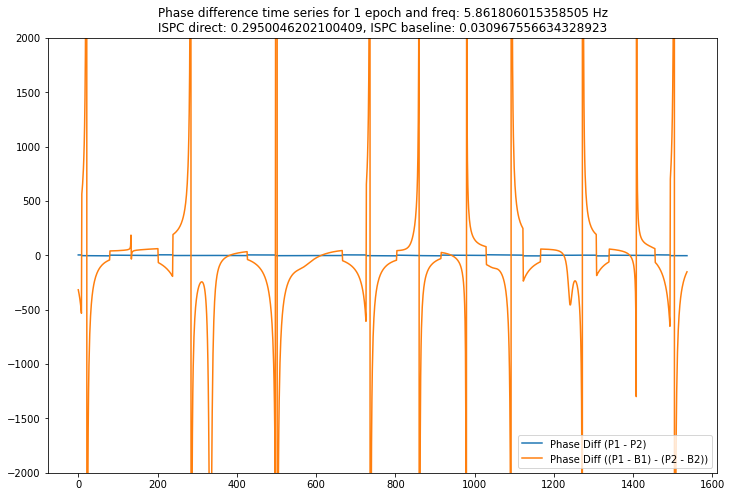

In [96]:
direct = d.data[0] - d.data[1]

#based = (d.data[0] - b.data[0]) - (d.data[1] - b.data[1])
based = (d.data[0] - np.mean(b.data[0], axis=-1)[:, np.newaxis]) - (d.data[1] - np.mean(b.data[1], axis=-1)[:, np.newaxis])
#based = (1j * d.data[0] - 1j * b.data[0]) - (1j * d.data[1] - 1j * b.data[1])
#based = (1j * d.data[0] - np.mean(1j * b.data[0], axis=-1)[:, np.newaxis]) - (1j * d.data[1] - np.mean(1j * b.data[1], axis=-1)[:, np.newaxis])
bll = d.data[1] - np.mean(b.data[1], axis=-1)[:, np.newaxis]
based = (100*(d.data[0] - np.mean(b.data[0], axis=-1)[:, np.newaxis]) - bll) / bll

freq_id = 3
plt.figure(figsize=(12,8))
plt.plot(direct[freq_id])
plt.plot(based[freq_id])
ispc_direct = core_ispc(direct[freq_id], d.times)
ispc_based = core_ispc(based[freq_id], d.times)
plt.legend(["Phase Diff (P1 - P2)", "Phase Diff ((P1 - B1) - (P2 - B2))"])
plt.title("Phase difference time series for 1 epoch and freq: {} Hz\nISPC direct: {}, ISPC baseline: {}".format(early.freqs[freq_id],
                                                                                                                ispc_direct, ispc_based))
plt.ylim([-2000, 2000])
print("ISPC from direct subtract: ", )

No baseline correction applied


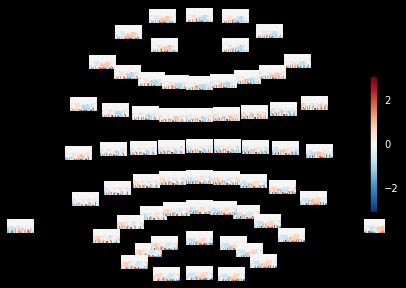

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

d = early_ep.plot_topo()

No baseline correction applied


<IPython.core.display.Javascript object>


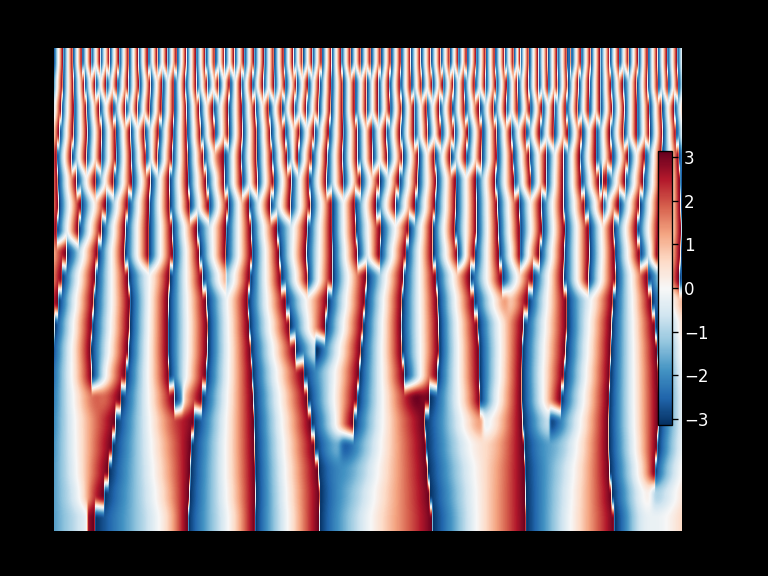

In [28]:
d = base_ep.plot_topo()

No baseline correction applied


<IPython.core.display.Javascript object>


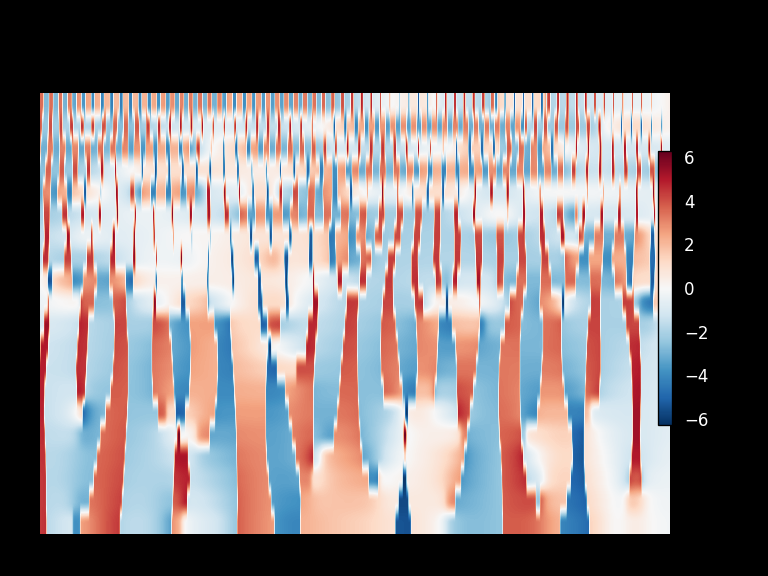

In [29]:
d = diff_ep.plot_topo(show=False)
